In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_url = 'https://raw.githubusercontent.com/HKBU-DavidLo/stock_analysis/master/data/close_prices.csv'
close = pd.read_csv(data_url, index_col=0, parse_dates=True, dayfirst=True)

In [3]:
close.head()

,BDEV.L,CRST.L,PSN.L,TW.L
2018-01-10,558.200012,346.399994,2318.0,168.399994
2018-01-11,529.799988,363.399994,2363.0,166.250000
2018-01-15,616.400024,526.500000,2619.0,197.699997
2018-01-16,618.400024,525.000000,2621.0,198.199997
2018-01-17,609.799988,520.000000,2610.0,196.649994


In [5]:
bdev = close['BDEV.L'].copy()
bdev.head()

2018-01-10    558.200012
2018-01-11    529.799988
2018-01-15    616.400024
2018-01-16    618.400024
2018-01-17    609.799988
Name: BDEV.L, dtype: float64

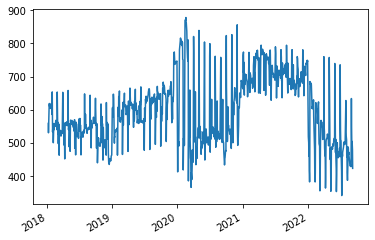

In [6]:
bdev.plot();

In [8]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 50.4 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [9]:
import pmdarima as pm

In [10]:
Ntest = 30
train = bdev.iloc[:-Ntest]
test = bdev.iloc[-Ntest:]

In [11]:
model = pm.auto_arima(train, error_action='ignore', trace=True, suppress_warnings=True, maxiter=10, seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=12472.502, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12652.822, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12604.603, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12572.103, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12650.823, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=12470.233, Time=0.46 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=12524.686, Time=0.40 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12469.297, Time=0.40 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=12471.812, Time=0.52 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=12558.934, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=12466.784, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=12570.105, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=12602.605, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=12469.803, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1150
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -6230.392
Date:                Fri, 03 Feb 2023   AIC                          12466.784
Time:                        15:17:05   BIC                          12481.924
Sample:                             0   HQIC                         12472.500
                               - 1150                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5877      0.021     27.504      0.000       0.546       0.630
ma.L1         -0.9370      0.011    -86.368      0.000      -0.958      -0.916
sigma2      3161.5233     67.286     46.987      0.000    3029.646    3293.401
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6007.43
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.81   Skew:                             0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
model.get_params()

{'maxiter': 10,
 'method': 'lbfgs',
 'order': (1, 1, 1),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 0),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': False}

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


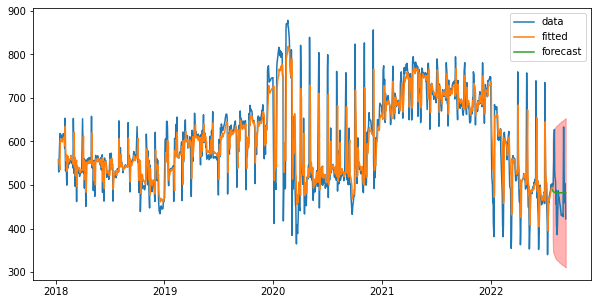

In [16]:
d = model.get_params()['order'][1]
train_pred = model.predict_in_sample(start=d, end=-1)
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(bdev.index, bdev, label='data')
ax.plot(train.index[d:], train_pred, label='fitted') # no data before d is available
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:, 0], confint[:, 1], \
                color='red', alpha=.3)
ax.legend();

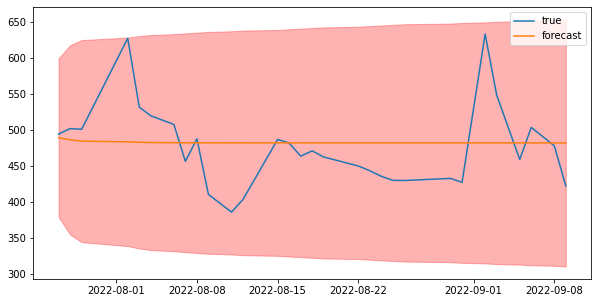

In [18]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test, label='true')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:, 0], confint[:, 1], \
                color='red', alpha=.3)
ax.legend();

In [19]:
def rmse(y, t):
  return np.sqrt(np.mean((t - y)**2))

In [27]:
print("RMSE ARIMA: ", rmse(model.predict(n_periods=Ntest).to_numpy(), test))
print("RMSE Naive: ", rmse(train.iloc[-1], test))

RMSE ARIMA:  56.33270967640901
RMSE Naive:  59.135429248081266


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


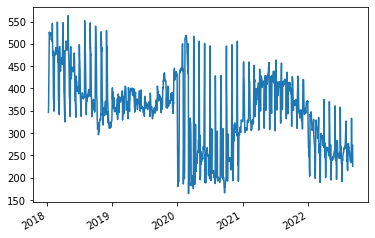

In [28]:
crst = close['CRST.L'].copy()
crst.plot();

In [29]:
train = crst.iloc[:-Ntest]
test = crst.iloc[-Ntest:]
model = pm.auto_arima(train, error_action='ignore', trace=True, suppress_warnings=True, maxiter=10, seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11903.111, Time=0.75 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12067.211, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12052.186, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12045.145, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12065.214, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11899.843, Time=0.55 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=11998.734, Time=0.37 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11902.359, Time=0.80 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=11906.945, Time=1.09 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=11945.209, Time=0.51 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11902.615, Time=0.43 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=11903.629, Time=0.68 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=11897.429, Time=0.31 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=11996.778, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1150
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -5944.715
Date:                Fri, 03 Feb 2023   AIC                          11897.429
Time:                        15:36:42   BIC                          11917.616
Sample:                             0   HQIC                         11905.050
                               - 1150                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6037      0.026     23.589      0.000       0.554       0.654
ma.L1         -0.8741      0.033    -26.561      0.000      -0.939      -0.810
ma.L2         -0.0798      0.030     -2.659      0.008      -0.139      -0.021
sigma2      1837.8238     37.685     48.768      0.000    1763.962    1911.686
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              7606.97
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                             0.90
Prob(H) (two-sided):                  0.02   Kurtosis:                        15.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
model.get_params()

{'maxiter': 10,
 'method': 'lbfgs',
 'order': (1, 1, 2),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 0),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': False}

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


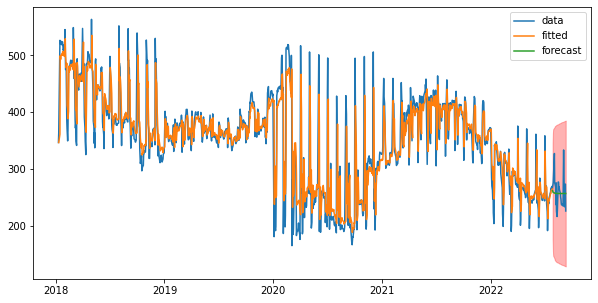

In [32]:
d = model.get_params()['order'][1]
train_pred = model.predict_in_sample(start=d, end=-1)
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(crst.index, crst, label='data')
ax.plot(train.index[d:], train_pred, label='fitted') # no data before d is available
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:, 0], confint[:, 1], \
                color='red', alpha=.3)
ax.legend();

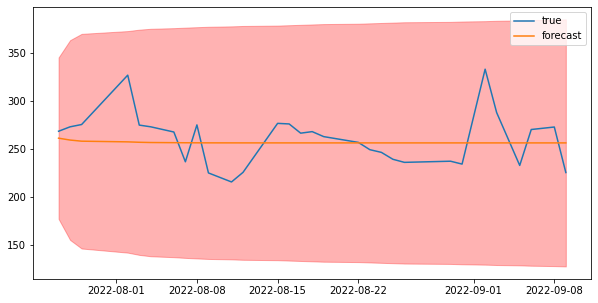

In [33]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test, label='true')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:, 0], confint[:, 1], \
                color='red', alpha=.3)
ax.legend();

In [34]:
print("RMSE ARIMA: ", rmse(model.predict(n_periods=Ntest).to_numpy(), test))
print("RMSE Naive: ", rmse(train.iloc[-1], test))

RMSE ARIMA:  27.1011102844739
RMSE Naive:  27.390998645687777


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
